# Practice Problem: HR Analytics

# Predicting the right people for promotion (only for manager position and below) and prepare them in time

Intro: HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.


In [1]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt

# import seaborn for more plotting options(built on top of matplotlib)
import seaborn as sns


# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# display plots on the notebook itself
%matplotlib inline

import os
from scipy import stats

# Reading the data files

In [2]:
path = r"C:\Users\krish\Downloads\proj"
os.chdir(path)
os.getcwd()
os.listdir()

['EDA',
 'Final presentation',
 'Model Building',
 'ReadMe.txt',
 'test.csv',
 'train.csv',
 'wns_hack_im_1.jpg']

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# Checking the target label spread

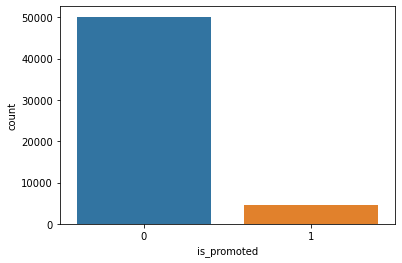

In [6]:
sns.countplot(train['is_promoted'])

In [7]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

# this is clearly imbalanced data

In [8]:
# lets check them in percent
train['is_promoted'].value_counts()/len(train)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

# glimpse of train

In [9]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Dropping unnecessary variables

In [10]:
train = train.drop('employee_id', axis = 1)

# Create test set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_set, test_set = train_test_split(train, test_size = 0.2, random_state = 42)

# To discover visual insights: EDA

# Looking for correlations

In [13]:
corr_matrix = train_set.corr()
corr_matrix["is_promoted"].sort_values(ascending=False)

is_promoted             1.000000
KPIs_met >80%           0.217676
awards_won?             0.195078
avg_training_score      0.183158
previous_year_rating    0.160966
length_of_service      -0.009547
age                    -0.014799
no_of_trainings        -0.026092
Name: is_promoted, dtype: float64

# Preparing for ML algorithms

In [14]:
train = train_set.drop("is_promoted", axis=1)
train_labels = train_set["is_promoted"].copy()

# Data cleaning

# Missing values

In [15]:
def miss_cal(data):
    return(data.isnull().sum()/len(data)*100)

In [16]:
miss_cal(train)

department              0.000000
region                  0.000000
education               4.445103
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.533184
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [18]:
# list_of_cat = 
train.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [19]:
train_num = train.drop(['department', 'region', 'education', 'gender', 'recruitment_channel'],
                       axis=1) 
# dropping categorical variables because median is for numerical variables

In [20]:
imputer.fit(train_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [21]:
X = imputer.transform(train_num)

In [22]:
train_tr = pd.DataFrame(X, columns=train_num.columns)

# Handling Text and Categorical Attributes